In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Diabetes

Preparamos los datos

In [5]:
data_diabetes = pd.read_csv('diabetes.csv')
Y = data_diabetes['class']
X = data_diabetes.drop(['class'],axis=1)

Dividimos los datos en datos de prueba y datos de entrenamiento usando la función `train_test_split()`. 

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.34, random_state=10)

Construimos el clasificador de árbol de decisión y lo entrenamos con los datos de entrenamiento.

In [14]:
clf_1 = DecisionTreeClassifier(criterion='entropy',max_depth=1)
clf_1 = clf_1.fit(X_train,Y_train)

In [15]:
Yp = clf_1.predict(X_test)

### Midiendo la precisión del modelo 

In [16]:
acc = accuracy_score(Y_test,Yp)

In [17]:
print(acc)

0.7213740458015268


In [42]:
def test_models(dataset_path: str):
    # Obtención de los datos
    data = pd.read_csv(dataset_path)
    Y = data['class']
    X = data.drop(['class'],axis=1)
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.34, random_state=10)

    # Entrenamiento de árboles 
    tree_one_level   = DecisionTreeClassifier(criterion='entropy',max_depth=1)
    tree_multi_level = DecisionTreeClassifier(criterion='entropy',max_depth=None)

    tree_one_level   = tree_one_level.fit(X_train,Y_train)
    tree_multi_level = tree_multi_level.fit(X_train,Y_train)

    # Prueba de clasificadores
    Y_prediction_one_level   = tree_one_level.predict(X_test)
    Y_prediction_multi_level = tree_multi_level.predict(X_test)

    accuracy = {
                'One-level Decission Tree':accuracy_score(Y_test,Y_prediction_one_level),
                'Multi-level Decission Tree':accuracy_score(Y_test,Y_prediction_multi_level)
                }

    # Graficamos la precisión de cada clasificador
    labels = list(accuracy.keys())
    vals  = list(accuracy.values())

    fig = plt.figure(figsize=(4,3))
    plt.bar(labels,vals,color='green',width=0.2)
    plt.ylabel('Precisión')
    nombre = dataset_path.split('.')[0]
    plt.title('Precisión de árboles de decisión '+nombre)
    plt.savefig(nombre+'_accuracy.png')




    

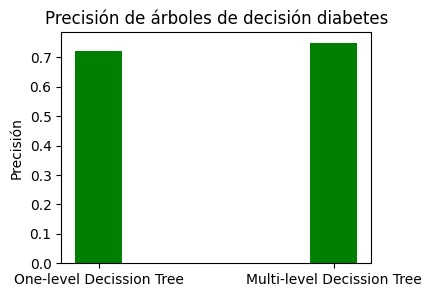

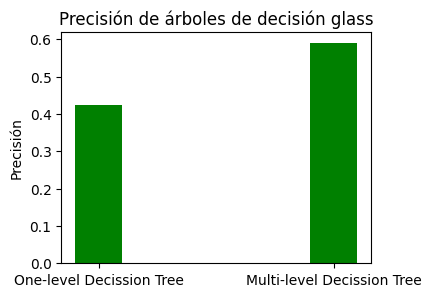

In [34]:
test_models('diabetes.csv')
test_models('glass.csv')

In [39]:
def measure_plot_accuracy(dataset_path:str):
    # Obtención de los datos
    data = pd.read_csv(dataset_path)
    Y = data['class']
    X = data.drop(['class'],axis=1)
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.34, random_state=10)

    accuracy = []
    num_samples = []

    # Variamos el número de pruebas
    for n in range(1,len(Y_train),5):
        multi_level_tree = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=n)
        multi_level_tree = multi_level_tree.fit(X_train, Y_train)

        prediction = multi_level_tree.predict(X_test)

        accuracy.append(accuracy_score(Y_test,prediction))
        num_samples.append(n)
    
    # Graficamos los resultados
    nombre = dataset_path.split('.')[0]
    fig = plt.figure(figsize=(4,3))
    plt.plot(num_samples,accuracy)
    plt.xlabel('Min Samples Leaf')
    plt.ylabel('Accuracy')
    plt.title('Variación de precisión según número de muestras '+nombre)
    plt.savefig('min_sample_acc_'+nombre+'.png')
    


    

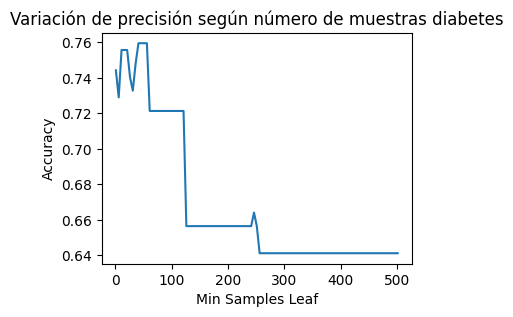

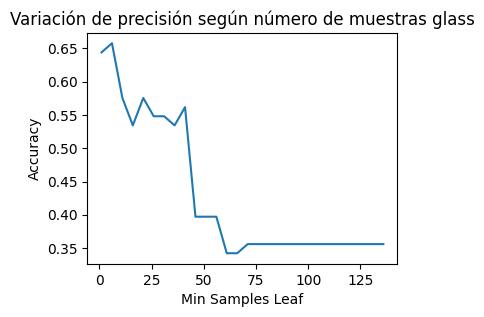

In [41]:
measure_plot_accuracy('diabetes.csv')
measure_plot_accuracy('glass.csv')